EDA
---

In [45]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('dark_background')



data_path = './data/'

In [46]:
os.listdir(data_path)

['ISS.OEM_J2K_EPH2-07-2-22.xml',
 'ISS.OEM_J2K_EPH2-11-2-26.xml',
 'ISS.OEM_J2K_EPH2-14-3-01.xml',
 'ISS.OEM_J2K_EPH2-16-3-03.xml',
 'ISS.OEM_J2K_EPH2-18-3-05.xml']

In [57]:
dt = pd.read_xml(data_path + 'ISS.OEM_J2K_EPH2-07-2-22.xml', xpath = './/COMMENT')

ValueError: xpath does not return any nodes. Be sure row level nodes are in xpath. If document uses namespaces denoted with xmlns, be sure to define namespaces and use them in xpath.

In [65]:
#import feb 7 -- 22 data.
# commented at the top are important dates for resupply missions, orbital boosting, other. Look at the file directly for these.
df1 = pd.read_xml(data_path + 'ISS.OEM_J2K_EPH2-07-2-22.xml', xpath = './/stateVector', encoding = 'UTF-8')
df1.head()

,EPOCH,X,Y,Z,X_DOT,Y_DOT,Z_DOT
0,2022-038T12:00:00.000Z,-3861.927317,-4195.374309,-3710.049287,2.287909,-5.900059,4.299766
1,2022-038T12:04:00.000Z,-3179.534902,-5442.213100,-2555.816961,3.364414,-4.426590,5.260423
2,2022-038T12:08:00.000Z,-2266.447429,-6294.144132,-1215.632349,4.198498,-2.629026,5.839664
3,2022-038T12:12:00.000Z,-1188.647984,-6688.586355,213.130283,4.728439,-0.637478,5.993819
4,2022-038T12:16:00.000Z,-24.360793,-6596.235836,1626.312374,4.914683,1.402652,5.710471


In [58]:
df2 = pd.read_xml(data_path + 'ISS.OEM_J2K_EPH2-18-3-05.xml', xpath = './/stateVector')
df2['EPOCH'] = pd.to_datetime(df2['EPOCH'], format = date_format)

In [66]:
#change EPOCH to datetime
date_format = '%Y-%jT%H:%M:%S.%fZ'
df1['EPOCH'] = pd.to_datetime(df1['EPOCH'], format = date_format)

In [67]:
df2 = pd.read_xml(data_path + 'ISS.OEM_J2K_EPH2-18-3-05.xml', xpath = './/stateVector')
df2['EPOCH'] = pd.to_datetime(df2['EPOCH'], format = date_format)

In [68]:
df = pd.concat([df1,df2])

In [73]:
df['EPOCH'].min(), df['EPOCH'].max()

(Timestamp('2022-02-07 12:00:00'), Timestamp('2022-03-05 12:00:00'))

In [74]:
df.drop_duplicates(keep = 'first', ignore_index = True)

,EPOCH,X,Y,Z,X_DOT,Y_DOT,Z_DOT
0,2022-02-07 12:00:00,-3861.927317,-4195.374309,-3710.049287,2.287909,-5.900059,4.299766
1,2022-02-07 12:04:00,-3179.534902,-5442.213100,-2555.816961,3.364414,-4.426590,5.260423
2,2022-02-07 12:08:00,-2266.447429,-6294.144132,-1215.632349,4.198498,-2.629026,5.839664
3,2022-02-07 12:12:00,-1188.647984,-6688.586355,213.130283,4.728439,-0.637478,5.993819
4,2022-02-07 12:16:00,-24.360793,-6596.235836,1626.312374,4.914683,1.402652,5.710471
...,...,...,...,...,...,...,...
11137,2022-03-05 11:44:00,-1617.172634,5811.915098,-3138.747925,-5.825532,1.004555,4.863254
11138,2022-03-05 11:48:00,-2939.654841,5839.158105,-1871.522606,-5.127851,-0.779273,5.632571
11139,2022-03-05 11:52:00,-4048.592064,5442.251213,-467.971380,-4.056746,-2.508369,5.992176
11140,2022-03-05 11:56:00,-4863.172342,4649.677332,969.689743,-2.689878,-4.056206,5.914975


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11142 entries, 0 to 5665
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   EPOCH   11142 non-null  datetime64[ns]
 1   X       11142 non-null  float64       
 2   Y       11142 non-null  float64       
 3   Z       11142 non-null  float64       
 4   X_DOT   11142 non-null  float64       
 5   Y_DOT   11142 non-null  float64       
 6   Z_DOT   11142 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 696.4 KB


In [76]:
#about 18 observations an hour
60*60*len(df)/(df['EPOCH'].max()-df['EPOCH'].min()).total_seconds()

17.85576923076923

In [77]:
df.head()

,EPOCH,X,Y,Z,X_DOT,Y_DOT,Z_DOT
0,2022-02-07 12:00:00,-3861.927317,-4195.374309,-3710.049287,2.287909,-5.900059,4.299766
1,2022-02-07 12:04:00,-3179.534902,-5442.213100,-2555.816961,3.364414,-4.426590,5.260423
2,2022-02-07 12:08:00,-2266.447429,-6294.144132,-1215.632349,4.198498,-2.629026,5.839664
3,2022-02-07 12:12:00,-1188.647984,-6688.586355,213.130283,4.728439,-0.637478,5.993819
4,2022-02-07 12:16:00,-24.360793,-6596.235836,1626.312374,4.914683,1.402652,5.710471


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11142 entries, 0 to 5665
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   EPOCH   11142 non-null  datetime64[ns]
 1   X       11142 non-null  float64       
 2   Y       11142 non-null  float64       
 3   Z       11142 non-null  float64       
 4   X_DOT   11142 non-null  float64       
 5   Y_DOT   11142 non-null  float64       
 6   Z_DOT   11142 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 696.4 KB


In [79]:
# x,y,z appear to be positions in kilometers (earth is ~6400 km radius)
# dot values are speeds in km/s (LEO is about 7.8 km/s)
df.describe()

,X,Y,Z,X_DOT,Y_DOT,Z_DOT
count,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000
mean,-121.736057,99.825954,-131.375016,-0.150875,-0.090467,0.103465
std,4314.175802,3643.962971,3775.163335,4.888308,4.100878,4.232126
min,-6798.479680,-6698.297782,-5337.116822,-7.648336,-7.541656,-6.018262
25%,-4254.245499,-3416.806525,-3889.477407,-4.890383,-3.923787,-4.135635
50%,-297.375449,206.986266,-274.655457,-0.323938,-0.265366,0.306945
75%,4071.675553,3629.338553,3661.611902,4.589490,3.843997,4.295409
max,6792.339695,6708.879075,5329.374159,7.665206,7.569614,6.015102


### speed

In [91]:
df['speed'] = df.apply(lambda row: np.linalg.norm([row['X_DOT'],row['Y_DOT'],row['Z_DOT']]), axis = 1)

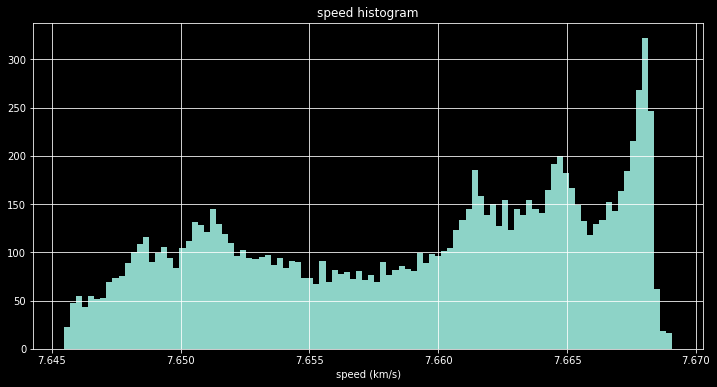

In [108]:
df['speed'].hist(bins = 100, figsize = (12,6))
plt.xlabel("speed (km/s)")
plt.title('speed histogram');

### distance from earth center

In [104]:
df['radius'] = df.apply(lambda row: np.linalg.norm([row['X'],row['Y'],row['Z']]), axis = 1)

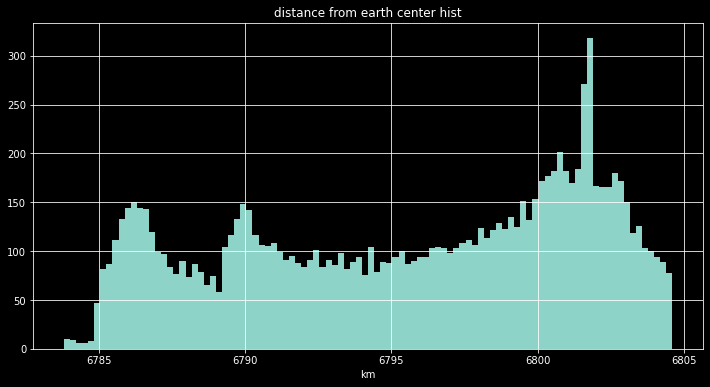

In [109]:
df.radius.hist(bins = 100, figsize = (12,6))
plt.title('distance from earth center hist')
plt.xlabel("km");

<AxesSubplot:xlabel='X', ylabel='Z'>

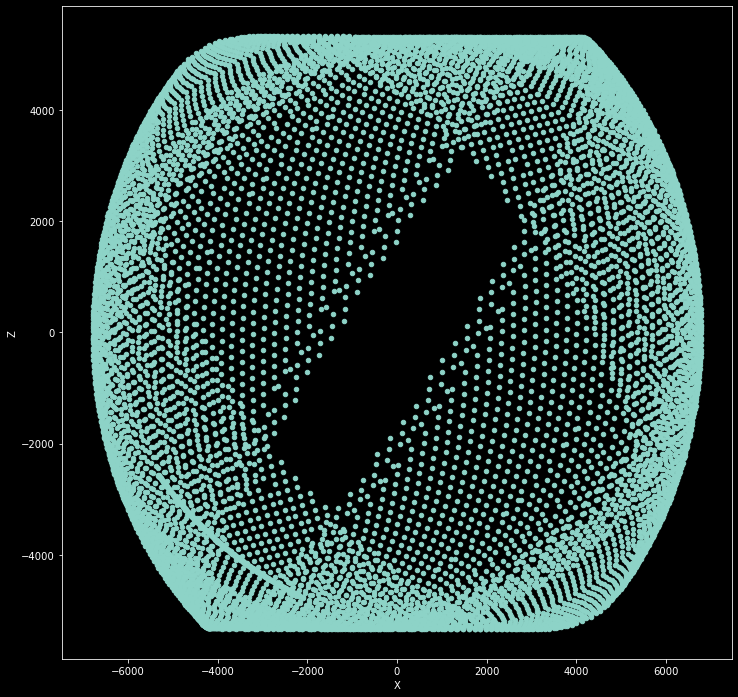

In [81]:
df.plot.scatter('X', "Z", figsize = (12,12), )

<AxesSubplot:xlabel='X_DOT', ylabel='Z_DOT'>

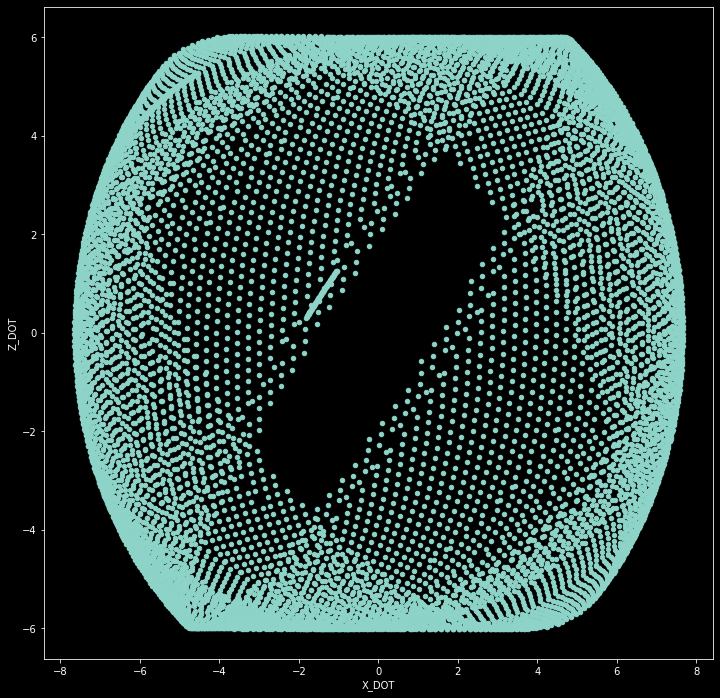

In [90]:
df.plot.scatter('X_DOT', "Z_DOT", figsize = (12,12), )

In [120]:
# convert to angles, latlon
df['azi'] = df.apply(lambda row: np.arctan(row['Y']/row['X']), axis = 1)
df['pol'] = df.apply(lambda row: np.arctan(row['Z']/6400), axis = 1)

Text(0.5, 1.0, 'longitude hist')

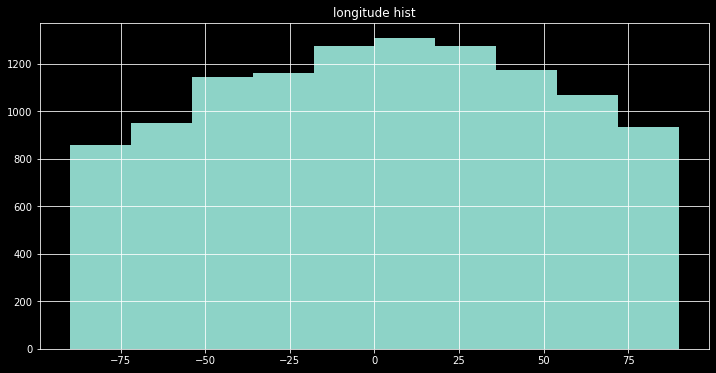

In [129]:
df['lon'] = df['azi']*180/np.pi
df['lon'].hist(figsize = (12,6))
plt.title("longitude hist")

Text(0.5, 1.0, 'latitude hist')

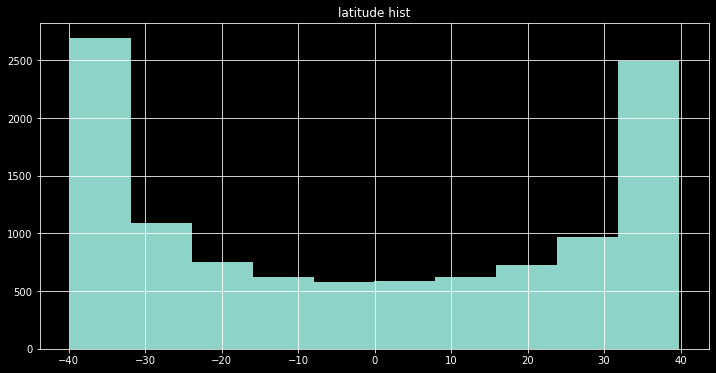

In [128]:
df['lat'] = df['pol']*180/np.pi
df['lat'].hist(figsize = (12,6))
plt.title("latitude hist")

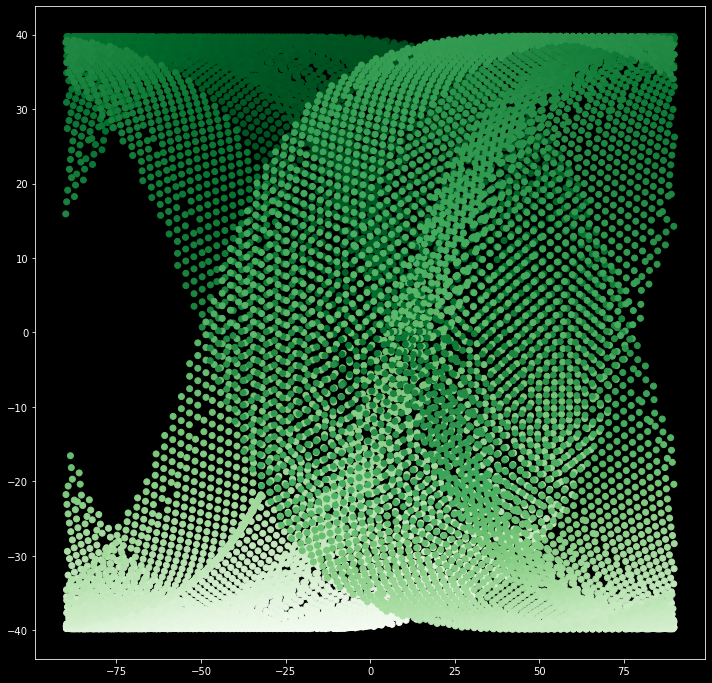

In [140]:
plt.figure(figsize = (12,12))
plt.scatter(df['lon'], df['lat'], c = df['speed'], cmap = "Greens")

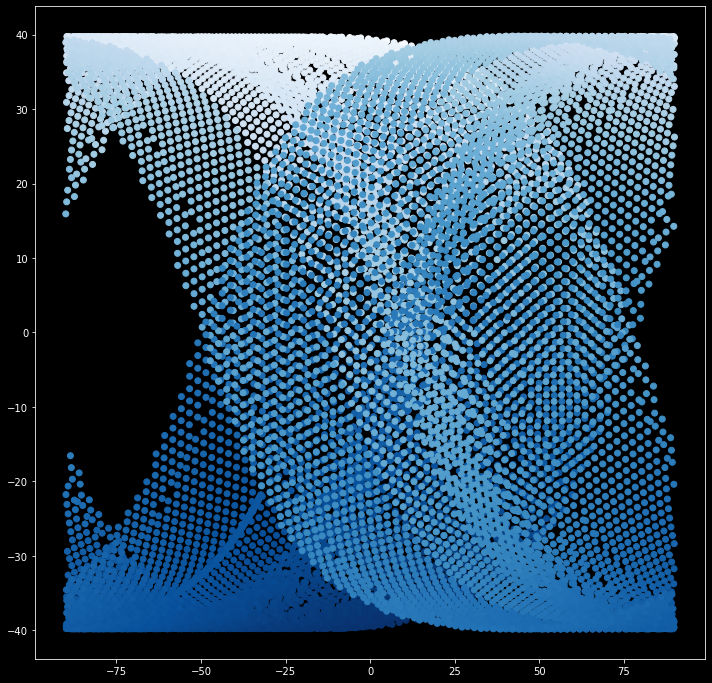

In [136]:
plt.figure(figsize = (12,12))
plt.scatter(df['lon'], df['lat'], c = df['radius'], cmap = "Blues")